In [2]:
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import warnings
sns.set(style="white")
%load_ext autoreload
%autoreload 2

In [3]:
espl = pd.read_pickle("espl.pkl")
y = pd.read_pickle("y-2s.pkl")

In [4]:
y.unique()

array(['camminata', 'camminata_tasca', 'corsa', 'corsa_tasca',
       'quotidiano', 'shake'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(espl, y, random_state=42)

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

DummyClassifier(strategy="stratified"): 24.1% di accuratezza


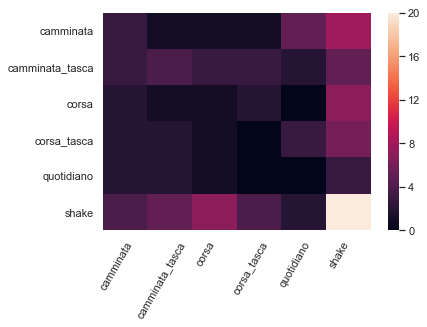

In [28]:
dc = DummyClassifier(strategy="stratified", random_state=42)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_val)

dummy_classifier_accuratezza = accuracy_score(y_val, y_pred)

print("DummyClassifier(strategy=\"stratified\"): {:.1f}% di accuratezza".format(100 * dummy_classifier_accuratezza))
sns.heatmap(confusion_matrix(y_val, y_pred), xticklabels=y.unique(), yticklabels=y.unique())
plt.xticks(np.arange(len(y.unique()))+0.3, y.unique(), rotation=60)
plt.show()

LogisticRegression(multi_class="multinomial"): 60.3% di accuratezza


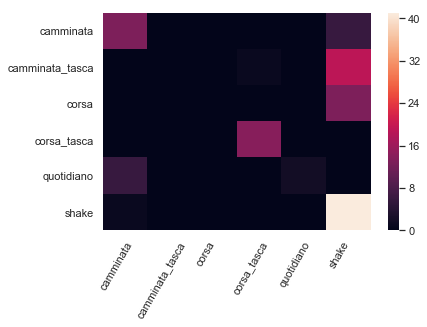

In [29]:
glmMult = LogisticRegression(penalty="l2", C = 10000, random_state=42, multi_class="multinomial", solver="lbfgs")
fit = glmMult.fit(X_train, y_train)
y_pred = fit.predict(X_val)

multinomial_accuratezza = accuracy_score(y_val, y_pred)
print("LogisticRegression(multi_class=\"multinomial\"): {:.1f}% di accuratezza".format(100 * multinomial_accuratezza))
sns.heatmap(confusion_matrix(y_val, y_pred), xticklabels=y.unique(), yticklabels=y.unique())
plt.xticks(np.arange(len(y.unique()))+0.3, y.unique(), rotation=60)
plt.show()